# SGD Classifier
---
- LogisticRegression + SGD(확률적경사하강법) 적용한 분류
- 필수 파라미터 => 손실함수 설정

In [278]:
# 모듈 로딩 ------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [279]:
# 경고 무시 -------------------------------------
# 향후 deprecated 된다는 경고 출력 막음
import warnings
warnings.filterwarnings(action='ignore')

In [280]:
# 파일 관련 --------------------------
FILE='./data/fish.csv'

### [1] 데이터 준비
---

In [281]:
fish = pd.read_csv(FILE)

In [282]:
print(fish.shape, fish.columns, sep='\n\n')

(159, 6)

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')


In [283]:
fish.columns[1:]

Index(['Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [284]:
# 특성 데이터 + 타겟 분리
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# fish_input = fish[fish.columns[1:]].to_numpy()
fish_target = fish['Species'].to_numpy()

In [285]:
## 학습용, 테스트용 데이터 분리 => 8 : 2
## random_state : 학습 시 랜덤한 동일 데이터로 진행 위해 사용
train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target, random_state=42)

In [286]:
## 표준화 평균0, 표준편차 1
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### [2] 모델 생성 및 함수

In [287]:
from sklearn.linear_model import SGDClassifier

In [288]:
# 최적화 경사하강법 변경 => BGD => SGD
# loss = 손실함수 : 모델에 따라 다름  ==> 'log' 곧 deprecated 예정
# max_iter = 1000 기본값 : 학습 횟수
sc = SGDClassifier(loss='log',
                   max_iter = 10,
                   random_state=42)
# 학습 진행 fit(): 반복 횟수 즉 max_iter 만큼 학습 진행
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [289]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


In [290]:
## partial_fit() - 1 epoch만 학습 진행
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


### 학습 횟수(epoch)와 과/소적합

In [291]:
# 기본 max_iter=1000
sc = SGDClassifier(loss='log', random_state=42)

train_score=[]
test_score=[]

# 분류 항목
classes = np.unique(train_target)

In [292]:
print('calssese : '), classes

calssese : 


(None,
 array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
       dtype=object))

In [293]:
# epoch 수 변화 시키며 모델 평가
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

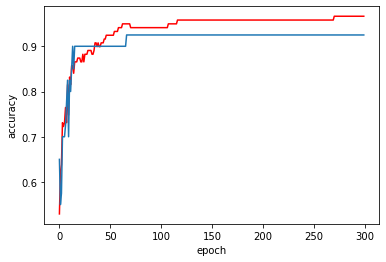

In [294]:
import matplotlib.pyplot as plt

plt.plot(train_score, color = 'r')
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [295]:
## 최적 epoch 수로 학습 진행

In [296]:
sc = SGDClassifier(loss='log', max_iter=2000, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.n_iter_)

0.957983193277311
0.925
2000


In [297]:
# early_stopping : 조기종료 여부 (기:False)
# n_iter_no_change : n번 동안 변경되지 않은 경우 early_stopping 이 True
# tol : 성능 개선의 기준값
sc = SGDClassifier(loss='log', tol=1.0,
                  random_state=42,
                  n_iter_no_change=10,
                  early_stopping=True)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.n_iter_)  # _붙은 것은 학습이 다 되어야지 나옴??

0.8319327731092437
0.875
11
